# import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore') #경고메시지 무시하는 옵션

In [2]:
pwd #리눅스 : 현재 폴더 위치를 확인하는 명령어

'D:\\AI_1400_kys\\AI2\\workspace\\day05'

# 데이터 로드

In [3]:
titanic_df = pd.read_csv("./train.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#상위 5행 출력
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#정보확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#컬럼별 null값이 몇개 있는지 확인
#.isnull() : 데이터가 있으면 False, 없으면 True
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#.fillna(채울값, inplace=True)
#나이는 평균값으로 채운다
titanic_df['Age'].mean() #29.69911764705882
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#선실과 정착지는 N으로 채운다
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

#컬럼별 null값 확인
print(f"전체 데이터셋의 null값 개수 :\n{titanic_df.isnull().sum()}")

전체 데이터셋의 null값 개수 :
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [14]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [15]:
#출력결과를 모두 볼 수 있도록 설정
pd.set_option('display.max_rows', 900)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,N,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,N,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,N,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,N,C


In [16]:
#중복값 확인
titanic_df[titanic_df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [20]:
#성별 승객수 확인
titanic_df['Sex'].value_counts()
# print(type(titanic_df['Sex'].value_counts()))

Sex
male      577
female    314
Name: count, dtype: int64

In [22]:
#선실별 승객수 확인
titanic_df['Cabin'].value_counts()

#선실정보의 첫번째 알파벳만 추출 후 개수 확인
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].value_counts()

Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [23]:
#정착지별 승객수 확인
titanic_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64

# 데이터시각화

Survived    0    1
Sex               
female     81  233
male      468  109


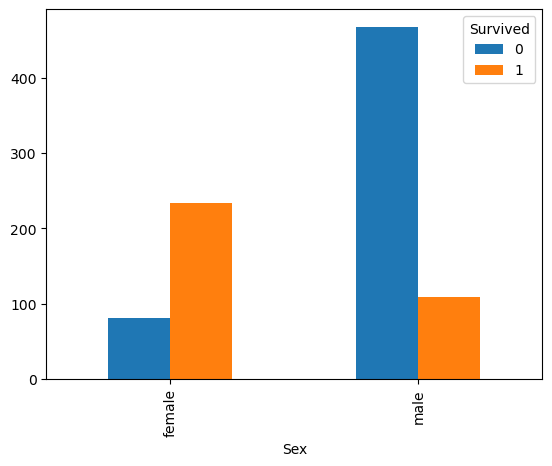

In [31]:
#성별과 생존자수를 기준으로 그래프 그리기
sex_sur = titanic_df.groupby(['Sex','Survived']).size().unstack()
print(sex_sur)
#다중 인덱스인 경우 인덱스 중 하나를 열로 변환하여 데이터를 보기 쉽게 변환 가능
sex_sur.plot(kind='bar')
plt.show()

<Axes: xlabel='Sex', ylabel='Survived'>

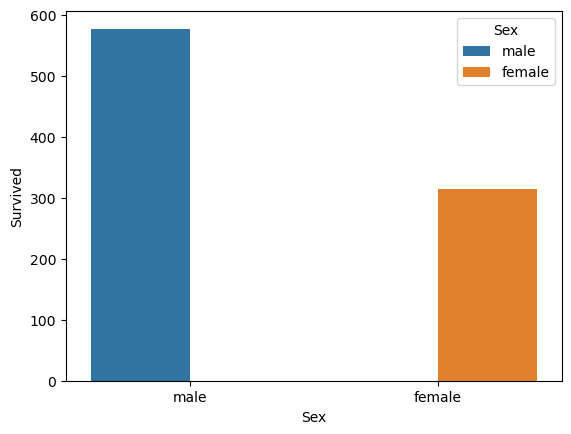

In [36]:
#seaborn 데이터 프레임과 x, y값을 넣어주면 알아서 그래프 그려줌
#성별과 생존자수를 기준으로 그래프 그리기

sns.barplot(x='Sex', y='Survived', data = titanic_df, estimator = len, hue='Sex')
#y축이 소수점으로 나온 이유 : Survived 열의 값이 0,1로만 이루어져있기 때문에
#seaborn이 자동으로 y축의 값 범위를 0~1까지로 설정해준다
#이산적인 값으로 표현하고 싶다면 estimator = len 매개변수를 추가하여
#각 그룹의 크기(수)를 계산하여 사용하면됨


<Axes: xlabel='Pclass', ylabel='Survived'>

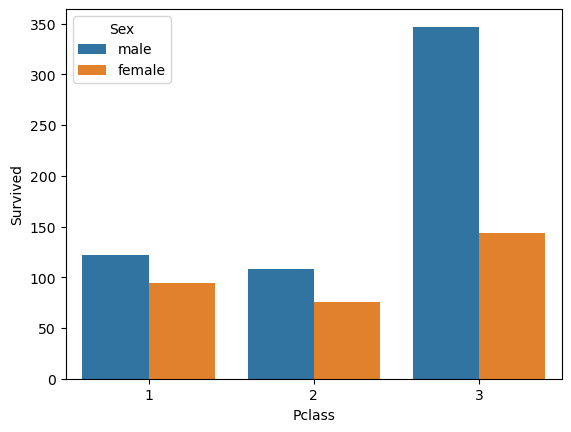

In [40]:
#X 축 : Pclass Y 축 : Survived 값으로 시각화 => seaborn
#barplot()

sns.barplot(x='Pclass', y='Survived', data=titanic_df, hue='Sex', estimator=len)


In [42]:
#Pclass Survived 값 확인
ps = titanic_df.groupby(['Pclass', 'Survived', 'Sex']).size()
print(ps)
#94 122

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64


<Axes: xlabel='Pclass', ylabel='Survived'>

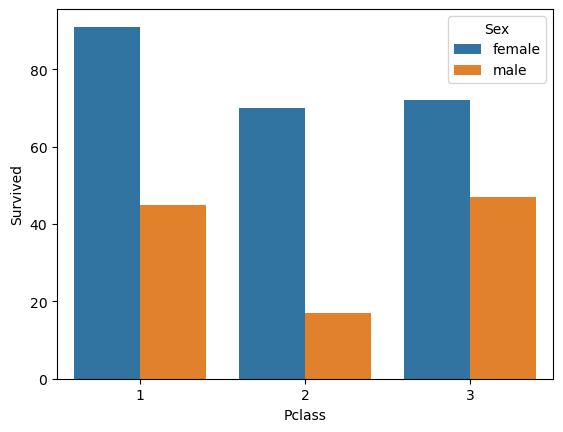

In [47]:
#생존한 사람들만 필터링
survived_df = titanic_df[titanic_df['Survived']==1]
# print(survived_df)

sns.barplot(x='Pclass', y='Survived', data=survived_df, hue='Sex', estimator=len)


In [51]:
titanic_df['Age'].value_counts()
titanic_df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [52]:
#나이에 따른 카테고리 생성(0~80)
def age_category(age):
    result = ''
    if age<= -1:
        result = "Unknown"
    elif age <= 5:
        result = "baby"
    elif age <= 12:
        result = "child"
    elif age <= 19:
        result = "teenager"
    elif age <= 25:
        result = "student"
    elif age <= 35:
        result = "young_adult"
    elif age <= 80:
        result = "adult"
    else:
        result = "elderly"
    return result

<Axes: xlabel='Age_Cate', ylabel='Survived'>

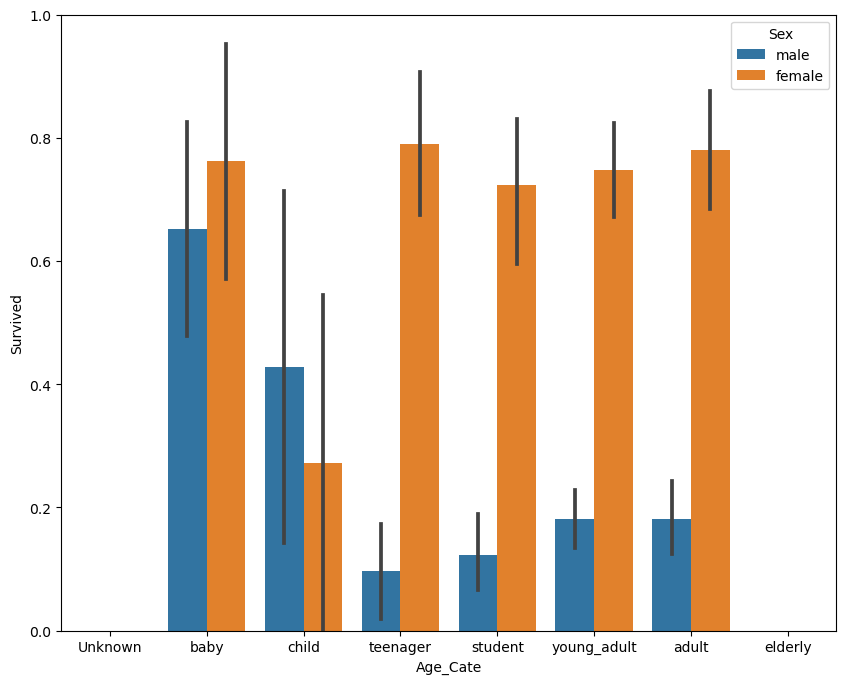

In [54]:
#나이 카테고리 그래프 그리기
plt.figure(figsize= (10, 8))

#x축 값을 순차적으로 표시
group_name = ['Unknown', 'baby', 'child', 'teenager', 'student', 'young_adult',
             'adult', 'elderly']
#나이에 따른 카테고리화
titanic_df['Age_Cate'] = titanic_df['Age'].apply(lambda x: age_category(x))
titanic_df.head()

sns.barplot(x='Age_Cate', y='Survived', hue='Sex', data=titanic_df,
           order=group_name)


<Axes: xlabel='Family', ylabel='Survived'>

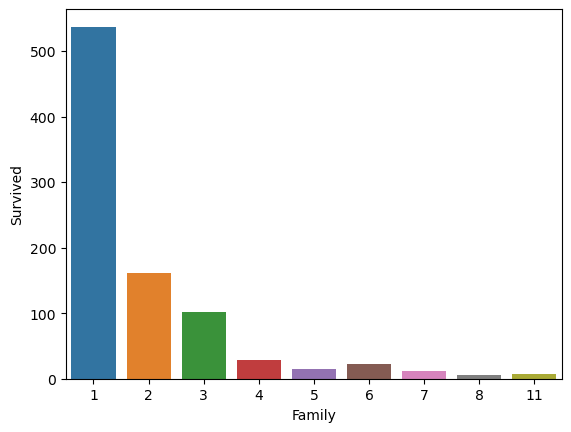

In [62]:
#가족 or 동승자수와 생존 여부에 따른 막대그래프
titanic_df['Family'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
sns.barplot(data = titanic_df, y='Survived', x='Family', estimator = len, ci=None)
#ci : 신뢰구간을 나타내는 매개변수
#None => 오차막대나 신뢰구간을 표시하지 않음(계산하지 않음)
#sd(Standard Deviation) : 표준편차를 사용하여 신뢰구간을 계산하고 표시
#boot(Bootstrap) : 부트스트랩을 사용하여 신뢰구간을 계산하고 표시

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

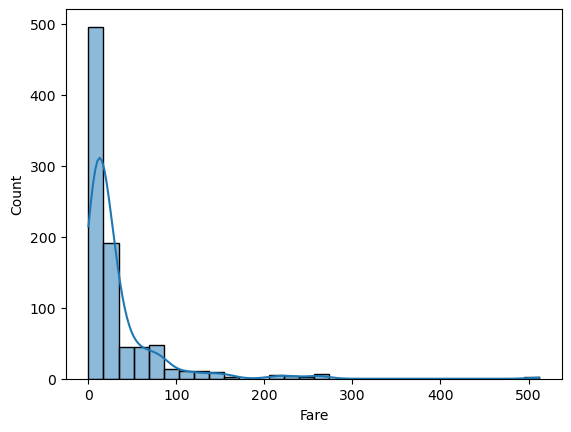

In [67]:
#탑승 요금 분포 그래프(히스토그램)
sns.histplot(data=titanic_df, x='Fare', bins=30, kde=True)
#kde(Kernel Density Estimation) : 히스토그램을 부드러운 곡선으로 표시
#bins = 30 : 30개의 구간으로 나누어서 탑승 요금의 분포를 표현

#탑승 요금에 대한 기술적 통계량 계산
titanic_df['Fare'].describe()

#중앙값 .median()
# titanic_df['Fare'].median() #14.4542

<Axes: xlabel='Survived', ylabel='Age'>

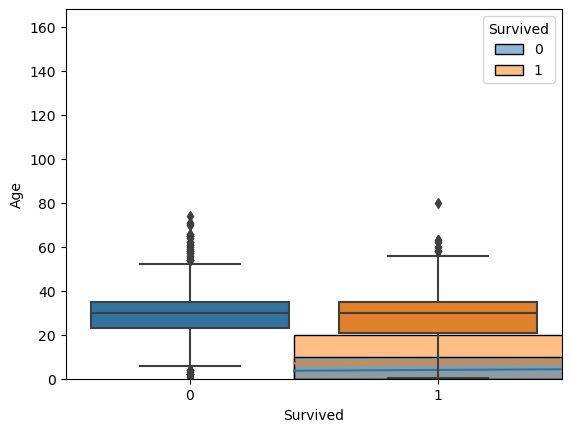

In [70]:
#나이에 따른 생존률 비교(히스토그램, 박스플롯)
sns.histplot(data=titanic_df, x='Age', hue='Survived', bins=30, kde=True)

sns.boxplot(data=titanic_df, x='Survived', y='Age')

In [72]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Age_Cate     891 non-null    object 
 13  Family       891 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB
